# 개요

* 입력 $x$에 대해 출력 $yt$을 예측
  + $x$, $y$ 모두 연속적인(Continuous) 값
  + 예) 근속년수 &rarr; 월급
* 입력변수는 $x$ 하나뿐! (그래서 "Simple" Linear Regression)
* $x$와 $y$는 서로 선형(Linear) 관계라 가정
  + 정확히 선형 관계는 아니지만 대체로 선형 관계
  + 선형 관계: $x$와 $y$의 관계를 직선식으로 표현할 수 있다.
* 2차원 평면에서의 직선식 :   $y=ax + b$
  + 머신러닝 적용
   - 트레이닝 과정을 통해 가장 적합한 $a$와 $b$를 찾아낸다. (어떻게?)
   - $a$와 $b$를 알면 모든 입력값 $x$에 대해 $y$를 예측할 수 있다.


# The Model
$
\huge y_{i} 
= \alpha + \beta {x_{i}} + \epsilon_{i}
$

* $x_i$: 입력값
* $y_i$: 출력값 (예측하려는 값)
* $\epsilon_{i}$: 오차
* $\alpha$, $\beta$: 트레이닝 데이터셋을 분석하여 찾아낼 값 (회귀계수, 학습의 결과)

# 손으로 해 보자
* $x$: 어떤 사람의 SNS 친구 수
* $y$: 인터넷에서 보내는 시간
* SNS 친구가 많을수록 &rarr; 인터넷에서 보내는 시간도 많을텐데...
  + 참고: "Chap.5 - Statistics"에서 사용했던 데이터
* Scatter Plot을 그려보자

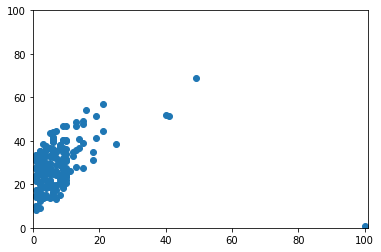

In [14]:
import matplotlib.pyplot as plt

num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

plt.axis([0,101,0,100])
plt.scatter(num_friends, daily_minutes)

### 선형 관계가 대략 보이는 듯 하다
* $y=\beta x + \alpha$
* 주어진 데이터와 Scatter Plot를 보면서 $\beta$(기울기)와 $\alpha$(절편)를 "대충" 찍어보자
  + 간단한 데이터, 원본 자체가 예쁜 데이터는 이렇게 몇 번의 시도로 "어느정도 적합한" 답을 찾을 수도 있다.

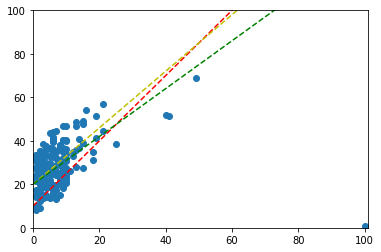

In [27]:
plt.axis([0,101,0,100])
plt.scatter(num_friends, daily_minutes)

x = range(0,101)

# alpah=10, beta=1.5 (red)
y1 = [1.5*xi + 10 for xi in x]
plt.plot(x,y1, 'r--')

# alpah=20, beta=1.3 (yellow)
y2 = [1.3*xi + 20 for xi in x]
plt.plot(x,y2, 'y--')

# alpah=20, beta=1.1 (green)
y3 = [1.1*xi + 20 for xi in x]
plt.plot(x,y3, 'g--')

plt.show()

### 예측하기
* $\alpha$와 $\beta$를 얻었다면, 임의의 입력 $x$에 대해 출력 $y$를 예측할 수 있다.

In [19]:
def predict(alpha: float, beta: float, x_i: float) -> float:
    return beta * x_i + alpha

In [28]:
# alpah=20, beta=1.1
# x=40 (SNS 친구가 40명일 때, 인터넷에서 노는 시간은 몇 분?)
predict(20, 1.1, 40)

64.0

### 오류
* $y_{i} = \alpha + \beta {x_{i}} + \epsilon_{i}$
* $y_i = \hat{y_i} + \epsilon_i$
  + $\hat{y_i}$: $\alpha$와 $\beta$를 이용하여 예측한 값
  + $\epsilon_i$: 오류 (예측한 값과 실제 값의 차이)
* 예측한 값과 실제 값의 차이가 적을수록 좋다

In [35]:
def error(alpha: float, beta: float, x_i: float, y_i: float) -> float:
    """
    The error from predicting beta * x_i + alpha
    when the actual value is y_i
    """
    return predict(alpha, beta, x_i) - y_i

### Sum of Squared Errors (SSE)
* 모든 데이터셋에 대해 오류 측정
  + 예) 예시된 100개의 $(x, y)$ 데이터에 대해 오류($\epsilon_i$) 측정
* 오류는 '+'일수도 있고 '-'일수도 있다 (예측값은 실제값보다 크거나 작을 것이므로)
* Sum of Errors
  + 측정된 모든 오류를 그대로 더해버리면 '+/-' 값이 서로를 상쇄시킬 수 있다 ("부호"를 제거해야 한다)
* "부호(+/-)"를 제거하는 방법
  + 절대값을 취한다 vs. 제곱한다
* "제곱값"의 장점
  + 부호를 없애준다 (음수 &rarr; 양수)
  + 큰 오류는 더 부각되게, 무시할 수 있는 작은 오류는 더 작게 
    - 0~1 사이의 작은 값은 더 작게 만든다 (${0.5}^2=0.025$)
    - 1보다 큰 값은 더 크게 만든다 ($5^2=25$)
* "오류를 최소화 한다" &rarr; "오류 제곱값의 합(Sum of Squared Errors, SSE)을 최소화 한다"
  - Least squared solution (최소자승법)

In [36]:
# 'scratch' package가 설치된 디렉토리로 작업 디렉토리 바꿈 (package를 import하기 위함)
import os, sys
os.chdir('..')

from scratch.linear_algebra import Vector

def sum_of_sqerrors(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    return sum(error(alpha, beta, x_i, y_i) ** 2
               for x_i, y_i in zip(x, y))

## Least Squares Solution
* $\alpha$와 $\beta$를 구하는 수학적/통계적인 해법 (No Machine-learning)
  + https://en.wikipedia.org/wiki/Simple_linear_regression
* $\hat{\beta} = \frac{Cov(x,y)}{Var(x)} = Cor(X,Y) * \frac{\sigma_Y}{\sigma_X}$
* $\hat{\alpha} = \bar{y} - \hat{\beta} \bar{x}$

In [37]:
from typing import Tuple
from scratch.linear_algebra import Vector
from scratch.statistics import correlation, standard_deviation, mean

def least_squares_fit(x: Vector, y: Vector) -> Tuple[float, float]:
    """
    Given two vectors x and y,
    find the least-squares values of alpha and beta
    """
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

In [38]:
x = [i for i in range(-100, 110, 10)]
y = [3 * i - 5 for i in x]

# Should find that y = 3x - 5
assert least_squares_fit(x, y) == (-5, 3)

from scratch.statistics import num_friends_good, daily_minutes_good

alpha, beta = least_squares_fit(num_friends_good, daily_minutes_good)
assert 22.9 < alpha < 23.0
assert 0.9 < beta < 0.905

## Coefficient of Determination (R_squared, 결정계수)
* 추정한 선형 모델이 얼마나 좋은가를 측정하는 척도중 하나
* $R^2=1-{SS_{res}\over{SS_{tot}}}$
  + $SS_{tot}=\sum_i(y_i-\overline{y})^2$
  + $SS_{res}=\sum_i(y_i-\hat{y_i})^2=\sum_i{\epsilon_i^2}$
  + $y_i$: 입력 $x_i$에 대응되는 실측값
  + $\hat{y_i}$: 입력 $x_i$에 대한 예측값
  + $\overline{y}$: 실측값들($y_i$)의 평균
* 결정계수가 0에 가까울수록 유용성이 낮은 반면, 결정계수의 값이 클수록(1에 가까울수록) 유용성이 높다
  + 1: 예측한 값이 모두 정확하다 (오류 없음)
  + 0: 그냥 실측값들($y_i$)의 평균값으로 예측한거나 마찬가지다 (쓸모 없다)
  + 0보다 작으면: 일부러 틀리게 예측하려고 작정했다

In [39]:
from scratch.statistics import de_mean

def total_sum_of_squares(y: Vector) -> float:
    """the total squared variation of y_i's from their mean"""
    return sum(v ** 2 for v in de_mean(y))

def r_squared(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    """
    the fraction of variation in y captured by the model, which equals
    1 - the fraction of variation in y not captured by the model
    """
    return 1.0 - (sum_of_sqerrors(alpha, beta, x, y) /
                  total_sum_of_squares(y))

rsq = r_squared(alpha, beta, num_friends_good, daily_minutes_good)
assert 0.328 < rsq < 0.330

# Using Gradient Descent

## 머신러닝 모형
1. 트레이닝 데이터셋 준비 ($(x,y)$ 쌍을 구성된 훈련용 예제)
2. $\alpha$와 $\beta$ 초기값 선택 (Random 선택)
3. 트레이닝 데이터셋을 대상으로 주어진  $\alpha$와 $\beta$를 이용하여 $y$값 예측
  + 트레이닝 데이터셋의 모든 데이터 포인트에 대해 예측 &rarr; 오류 측정 ($y_i - \hat{y_i}$)
  + Sum of Squared Errors(SSE) 측정
4. **SSE가 작아지도록 $\alpha$와 $\beta$ 값 수정**
5. 2~4 반복 (정해진 횟수만큼 반복 또는 SSE가 충분히 작아질 때까지)

---
 ##### 핵심
 * "SSE가 작아지도록" $\alpha$와 $\beta$ 값 수정하는 방법은?
 * 오류가 점점 작아지도록 $\alpha$와 $\beta$ 값을 반복적으로 조정한다 &rarr; Gradient Descent
 * Gradient of SSE (미분하기-수학문제)
   + $SSE = \sum_{i=1}^{n}(y_i - \alpha - \beta x_i)^2$
   + $\frac{\partial SSE}{\partial \alpha} = 2(y_i- \alpha - \beta x_i) = 2\epsilon_i$
   + $\frac{\partial SSE}{\partial \beta} = 2(y_i- \alpha - \beta x_i)x_i = 2\epsilon_i x_i$

---

In [41]:
    import random
    import tqdm
    from scratch.gradient_descent import gradient_step
    
    num_epochs = 10000
    random.seed(0)
    
    guess = [random.random(), random.random()]  # choose random value to start
    
    learning_rate = 0.00001
    
    with tqdm.trange(num_epochs) as t:
        for _ in t:
            alpha, beta = guess
    
            # Partial derivative of loss with respect to alpha
            grad_a = sum(2 * error(alpha, beta, x_i, y_i)
                         for x_i, y_i in zip(num_friends_good,
                                             daily_minutes_good))
    
            # Partial derivative of loss with respect to beta
            grad_b = sum(2 * error(alpha, beta, x_i, y_i) * x_i
                         for x_i, y_i in zip(num_friends_good,
                                             daily_minutes_good))
    
            # Compute loss to stick in the tqdm description
            loss = sum_of_sqerrors(alpha, beta,
                                   num_friends_good, daily_minutes_good)
            t.set_description(f"loss: {loss:.3f}")
    
            # Finally, update the guess
            guess = gradient_step(guess, [grad_a, grad_b], -learning_rate)
    
    # We should get pretty much the same results:
    alpha, beta = guess
    
    print('alpha', alpha)
    print('beta', beta)
    assert 22.9 < alpha < 23.0
    assert 0.9 < beta < 0.905

loss: 13196.619: 100%|██████████████████████████████████████████████████████████| 10000/10000 [00:51<00:00, 192.78it/s]


alpha 22.947552155340915
beta 0.9038659662765034
